## **COPM3602-project / Car Price Anaylsis** 
* [Dataset URL](https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge)
* [previous analysis on the dataset](https://www.kaggle.com/code/farhanmayyeri/car-price-prediction-elasticnet-grid-search)

#### **1. About Dataset**
>this dataset contains information about 19237 cars along with 18 attributes like price, manufacturer, cylinders...etc. the dataset can be use in many applicatoins such as understanding the impact of different specification on car price as well as training ML model to predicte the car price.

#### **2. Attributes Description**

>| Attribute | Type | Descriptoin |
| --- | --- | --- |
| ID | Numerical | Car Id from the collected source | 
| Price | Numerical | Car Price | 
| Levy | Numerical | Tax of importing and exporting the cars |
| Manufacturer | Categorical | Company that make the car |
| Model | Categorical | Car Model |
| Prod. year | Numerical | The year the car was made |
| Category | Categorical | The car category/ kind |
| Leather interior | Categorical | If the car seats made of leather |  
| Fuel Type | Categorical | The Type of car Fuel |
| Engine Volume | Numerical | The volume of fuel and air that can be pushed through a car's cylinders |  
| Mileage | Numerical | The number of miles that the car can travel using one gallon or litre of fuel | 
| Cylilnders | Numerical | Numer of Cyilders in the car |
| Gear Box Type | Categorical | The type of the gear box |
| Drive wheels | Categorical | Type of the wheel of a motor vehicle that transmits force |
| Doors | Numerical | Number of the doors |
| Wheel | Categorical | steering | 
| Color | Categorical | Car color |
| Airbags | Numerical | Number of airbags in the car |  


#### **3. bar plot to display the frequency distribution of all attributes**
#### **4. frequency distribution table for continues numerical attributes**
#### **5. Research questions (2-3)**



In [26]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# import the dataset
df = pd.read_csv('/content/drive/MyDrive/COMP3602-Project/car-price.csv')

In [28]:
# take a quick look at the data 
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [29]:
df.shape

(19237, 18)

- Alright so we have 19237 observations and 18 attributes

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

- It looks like we don't have any missing values, but from ```df.head()``` I can see that there's some missing value in the Levy attribute but they use "**-**" to note the missing value, we gonna change that later

In [31]:
# gimme some stats Maaan!!
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


1. the ID doesn't mean anything for us, we will dorp it
2. 50 % of the cars in the dataset was made in 2012 or before

In [32]:
# see how many missing value we have in the levy column
len(df[df.Levy == '-'])

5819

In [33]:
# replace the - with Nan values
df.Levy.replace({'-' : np.nan}, inplace = True)

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000.]),
 <a list of 6 Text major ticklabel objects>)

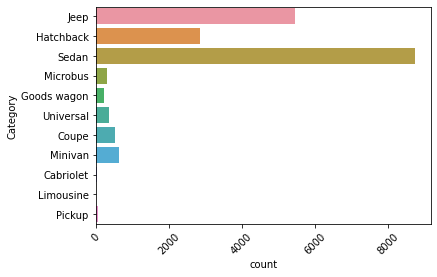

In [43]:
sns.countplot(data = df, y = 'Category')
plt.xticks(rotation=45)

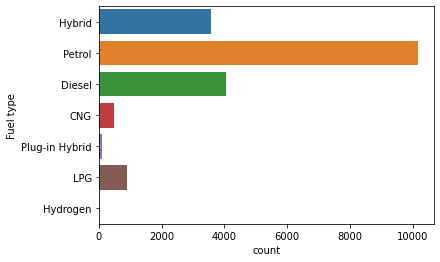

In [44]:
sns.countplot(data = df, y = 'Fuel type')

In [46]:
df.Doors.value_counts()

04-May    18332
02-Mar      777
>5          128
Name: Doors, dtype: int64

In [48]:
df.head(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,NaN,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [57]:
df.Doors.replace({'04-May' : 4, '02-Mar' : 2, '>5' : 4}, inplace = True)

In [58]:
df.Doors.value_counts()

4    18460
2      777
Name: Doors, dtype: int64

In [60]:
df[df['Manufacturer'] == 'TESLA']

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2010,45751914,53941,87,TESLA,Model X,2018,Sedan,Yes,Petrol,0,81907 km,6.0,Automatic,4x4,4,Left wheel,Silver,12
